# Objective : To predict world happiness score

In this task we have to predict the world happiness score on the basis of analysing the various factors given in the dataset below like GDP per capita, life expectancy, Family, etc.

* The target column is Happiness Score

#### Importing the various necessary libraries for the task.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
happy = pd.read_csv('./Downloads/happiness_score_dataset.csv')
happy.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Getting to know the dimension, description and pressence of the null values in the dataset.

In [3]:
happy.shape

(158, 12)

In [4]:
happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
happy.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

* By looking at the description of the data we get to know the mean, standard deviation, minimum value and much more of the every column.
* By observing the null values of the dataset we get to know that there is non present in it.

Also, by observing the dataset wecan conclude that columns name Country, Region and  happiness Rank does not contribute in any way for the prediction of the target column(Happiness Score). So, we cam drop thesee column from the dataset. 

#### EDA

1. Standard Error.

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


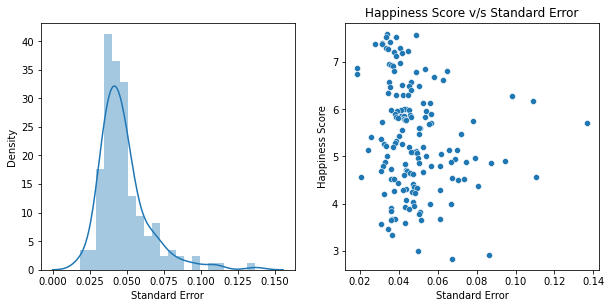

In [6]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(happy['Standard Error'])
plt.xlabel('Standard Error')
plt.subplot(222)
sns.scatterplot(x= 'Standard Error', y= 'Happiness Score', data= happy)
plt.xlabel('Standard Error')
plt.ylabel('Happiness Score')
plt.title('Happiness Score v/s Standard Error')
plt.show()

By observing both the graph of Standard Error we can conclude that it is a postive skewed data from the distplot and it is not highly in positive correlation with the Happiness Score.

2. Economy(GDP per Capita).

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


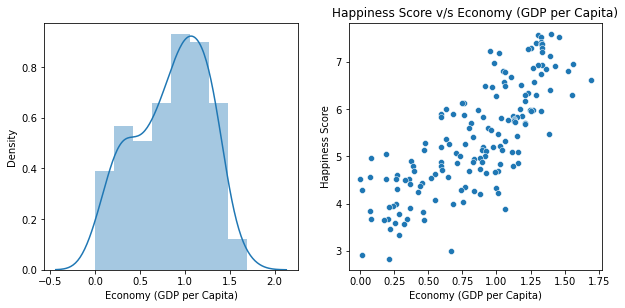

In [7]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(happy['Economy (GDP per Capita)'])
plt.xlabel('Economy (GDP per Capita)')
plt.subplot(222)
sns.scatterplot(x= 'Economy (GDP per Capita)', y= 'Happiness Score', data= happy)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score v/s Economy (GDP per Capita)')
plt.show()

By observing both the graph of Economy (GDP per Capita) we can conclude that it is skewed negatively and is not perfectly skewed from the distplot and it has positive correlation with Happiness Score from the scatterplot.

3. Family

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


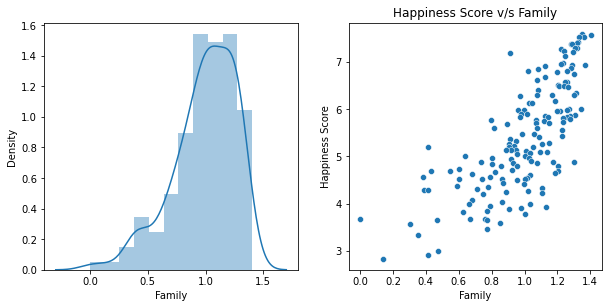

In [8]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(happy['Family'])
plt.xlabel('Family')
plt.subplot(222)
sns.scatterplot(x= 'Family', y= 'Happiness Score', data= happy)
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.title('Happiness Score v/s Family')
plt.show()

By observing both the graph of Family we can conclude that it is skewed negatively from the distplot and it has positive correlation with Happiness Score from the scatterplot.

4. Health (Life Expectancy)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


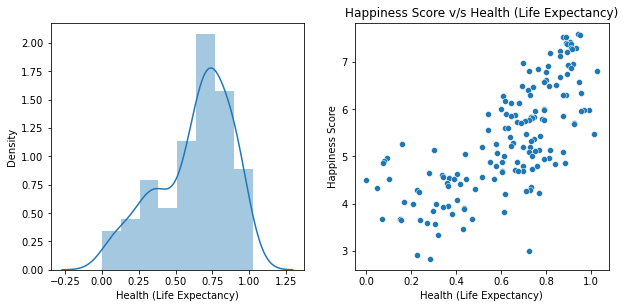

In [9]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(happy['Health (Life Expectancy)'])
plt.xlabel('Health (Life Expectancy)')
plt.subplot(222)
sns.scatterplot(x= 'Health (Life Expectancy)', y= 'Happiness Score', data= happy)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score v/s Health (Life Expectancy)')
plt.show()

By observing both the graph of Health (Life Expectancy) we can conclude that it is skewed negatively and is not perfectly skewed from the distplot and it has positive correlation with Happiness Score from the scatterplot.

5. Freedom

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


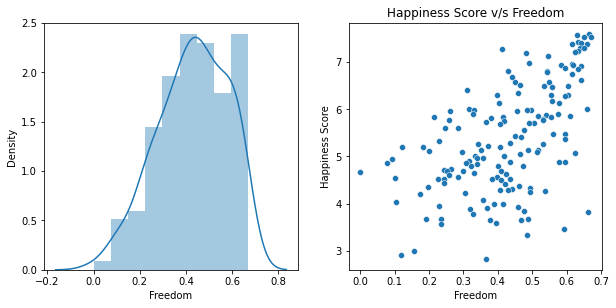

In [10]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(happy['Freedom'])
plt.xlabel('Freedom')
plt.subplot(222)
sns.scatterplot(x= 'Freedom', y= 'Happiness Score', data= happy)
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.title('Happiness Score v/s Freedom')
plt.show()

By observing both the graph of Freedom we can conclude that it is skewed negatively from the distplot and it has positive correlation with Happiness Score but data is more scattered from the scatterplot.

6. Trust (Government Corruption)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


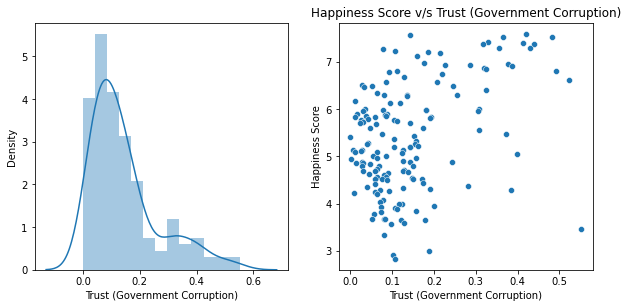

In [11]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(happy['Trust (Government Corruption)'])
plt.xlabel('Trust (Government Corruption)')
plt.subplot(222)
sns.scatterplot(x= 'Trust (Government Corruption)', y= 'Happiness Score', data= happy)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score v/s Trust (Government Corruption)')
plt.show()

By observing both the graph of Trust (Government Corruption) we can conclude that it is positively skewed from the distplot and its data is much scattered but it seems to have positive correlation with Happiness Score from the scatteredplot.

7. Generosity

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


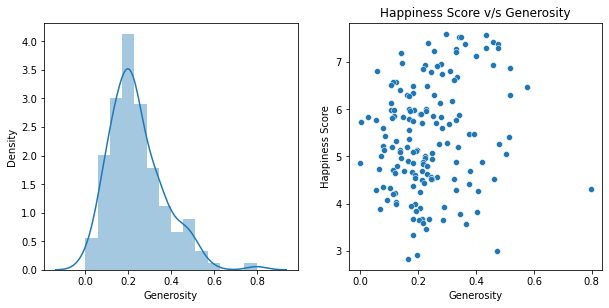

In [12]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(happy['Generosity'])
plt.xlabel('Generosity')
plt.subplot(222)
sns.scatterplot(x= 'Generosity', y= 'Happiness Score', data= happy)
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title('Happiness Score v/s Generosity')
plt.show()

By observing both the graph of Generosity we can conclude that it is positively skewed from the distplot and its data is much scattered but it seems to have positive correlation with Happiness Score from the scatteredplot.

8. Dystopia Residual

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


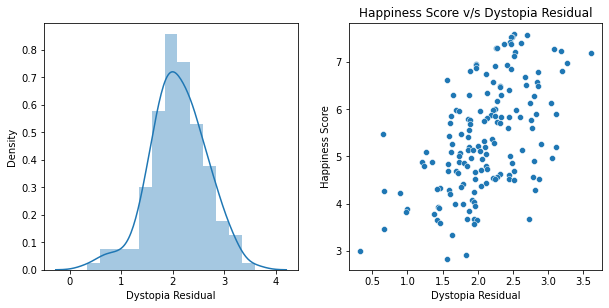

In [13]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(happy['Dystopia Residual'])
plt.xlabel('Dystopia Residual')
plt.subplot(222)
sns.scatterplot(x= 'Dystopia Residual', y= 'Happiness Score', data= happy)
plt.xlabel('Dystopia Residual')
plt.ylabel('Happiness Score')
plt.title('Happiness Score v/s Dystopia Residual')
plt.show()

By observing both the graph of Dystopia Residual we can conclude that it almost seems to be normal with a slight bit of negatively skewe from the distplot and has positive correlation with Happiness Score with data seems to be much scattered from the scatteredplot.

#### Checking the correlation of the each column with target column using heat map

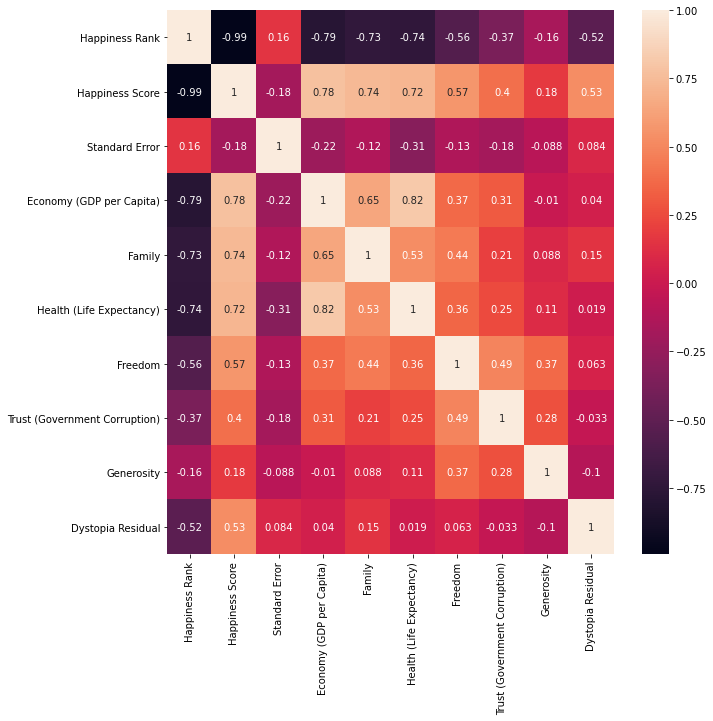

In [14]:
plt.figure(figsize= [10,10])
sns.heatmap(happy.corr(), annot= True)
plt.show()

By observing the heat map we can conclude that Happiness Score has high positive correlation with all the columns except the Standard Error column and Happiness Rank. But Happiness Rank does not play any role in the calculation of the Happiness Score. So the final conclusion from the heat map is that the only column which negative correlation with the target column is the Standard Error column.

#### To remove outliers

To remove outliers we either have to remove those rows or we have to scaled the data.

In [15]:
happy_1 = happy.drop(['Country','Region','Happiness Rank'], axis= 1)

In [16]:
X = happy_1.drop(['Happiness Score'], axis= 1)
y =  happy_1['Happiness Score']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 1)

In [18]:
lr = LinearRegression()
rfr = RandomForestRegressor()

In [19]:
cross_val_score(lr, X, y, cv= 5)

array([0.99999945, 0.99999834, 0.99999836, 0.99999535, 0.99999943])

In [20]:
cross_val_score(rfr, X, y, cv= 5)

array([-7.34320015, -1.12111234, -0.75423737, -2.10531921, -5.70198824])

By looking at the cross validation score of both the algorithms we can conclude that for this dataset the Linear Regression algorithm would suit much better then Random forrest algorithm.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale = StandardScaler()

In [23]:
scaledX_train = scale.fit_transform(X_train)
scaledX_test = scale.transform(X_test)

In [24]:
pred = lr.fit(scaledX_train, y_train).predict(scaledX_test)

In [25]:
df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': pred})
df.head()

,Actual Value,Predicted Value
29,6.574,6.574048
107,4.715,4.714756
14,7.119,7.119487
81,5.192,5.192284
124,4.419,4.419226


#### Now checking the accuracy of the model by using various metrics

1. R Squared method.

In [26]:
metrics.r2_score(y_test, pred)

0.9999999270958111

2. mean square error method

In [27]:
metrics.mean_squared_error(y_test, pred)

8.251349496190405e-08

#### By applying the R-Squared error and mean squared error methods on the model we can see that the model is very good in its prediction as R-squared value for the model is very high and the mean squared error value for the model is very low for the model. Hence we have achieved our objective to create a predictive model with high accuracy of prediction for the given dataset.